# Function to calculate the present value of a lifetime annuity

## If we assume that the payment is made monthly, we need to adjust the discount rate accordingly. The discount rate needs to be expressed on a monthly basis to match the frequency of payments:

$PVLA=PMT\frac{1}{r}(1-(1+r)^{-t})$

where: 

$t$ = number of month

$r$ = montly interest rate

In [55]:
def present_value_lifetime_annuity(payment_per_period, annual_interest_rate, life_expectancy_years):
    """
    Calculate the present value of a lifetime annuity with monthly payments.

    Parameters:
    payment_per_period (float): Payment amount per period (e.g., per month).
    annual_interest_rate (float): Annual interest rate (as a decimal).
    life_expectancy_years (int): Life expectancy in years.

    Returns:
    float: Present value of the lifetime annuity.
    """
    monthly_interest_rate = annual_interest_rate / 12  # Convert annual interest rate to monthly
    total_periods = life_expectancy_years * 12  # Convert life expectancy to months

    if monthly_interest_rate == 0:
        present_value = payment_per_period * total_periods
    else:
        present_value = payment_per_period / monthly_interest_rate * (1 - (1 / (1 + monthly_interest_rate) ** total_periods))
    return present_value

In [56]:
# Example usage:
payment_per_month = 10000/12  # Payment per month
annual_interest_rate = 0.03  # Annual interest rate (5%)
life_expectancy_years = 20  # Life expectancy in years
present_value = present_value_lifetime_annuity(payment_per_month, annual_interest_rate, life_expectancy_years)
print("Present Value of Lifetime Annuity (Monthly Payments): {:,.2f}$".format(present_value))

Present Value of Lifetime Annuity (Monthly Payments): 150,259.10$


## The function you provided calculates the present value of an amount received in the future at a specified age, taking into account the annual interest rate and the difference in age between when the amount is received and the current age.

$\text{PV} = \frac{\text{PMT}}{(1 + \text{r})^{t}}$

where: 

$t$ = number of month

$r$ = montly interest rate

In [57]:
def present_value(amount_received, annual_interest_rate, age_received, present_age):
    """
    Calculate the present value of an amount received in the future at a specified age.

    Parameters:
    amount_received (float): Amount received in the future.
    annual_interest_rate (float): Annual interest rate (as a decimal).
    age_received (int): Age at which the amount is received.
    present_age (int): Current age.

    Returns:
    float: Present value of the amount received at the specified age.
    """
    monthly_interest_rate = annual_interest_rate / 12  # Convert annual interest rate to monthly
    years_until_received = age_received - present_age  # Calculate years until amount is received

    present_value = amount_received / (1 + monthly_interest_rate) ** (years_until_received * 12)

    return present_value

In [58]:
# Example usage:
amount_received = 150259.10  # Amount received in the future
annual_interest_rate = 0.03  # Annual interest rate
age_received = 65  # Age at which the amount is received
present_age = 60  # Current age

pv_at_60 = present_value(amount_received, annual_interest_rate, age_received, present_age)
print("Present value at age 60: {:,.2f}$".format(pv_at_60))

Present value at age 60: 129,353.42$


## When retirement benefits begin before age 65, the benefit amount is reduced by 0.6% for each month between the beginning of the payments and the 65th birthday. Accordingly, a pensioner who is entitled to the maximum benefit will have the benefit amount reduced by 36% if he or she decides to retire at 60 years of age.

In [59]:
def calculate_reduced_benefit(original_benefit, retirement_age, reduction_rate=0.6):
    if retirement_age >= 65:
        return original_benefit  # No reduction if retirement age is 65 or older
    else:
        reduction_percent = (65 - retirement_age) * reduction_rate * 12  # Annual reduction rate
        reduced_benefit = original_benefit * (1 - reduction_percent / 100)
        return reduced_benefit

In [60]:
# Example usage:
original_benefit = 100  # Assuming the original benefit amount is $1000
retirement_age = 60  # Age at which retirement benefits begin
reduction_rate = 0.6  # Monthly reduction rate (0.6%)
reduced_amount = calculate_reduced_benefit(original_benefit, retirement_age, reduction_rate)
print("Reduced retirement benefit amount:", reduced_amount)

Reduced retirement benefit amount: 64.0


In [61]:
def present_value_lifetime_annuity_at_age(payment_per_period, annual_interest_rate, life_expectancy_years, age_received, present_age):
    """
    Calculate the present value at a specified age of a lifetime annuity starting at age 65.

    Parameters:
    payment_per_period (float): Payment amount per period (e.g., per month).
    annual_interest_rate (float): Annual interest rate (as a decimal).
    life_expectancy_years (int): Life expectancy in years.
    age_received (int): Age at which the amount is received (typically 65).
    present_age (int): Current age (age at which present value is calculated).

    Returns:
    float: Present value of the received amount at the specified age.
    """
    # Calculate amount received from present_value_lifetime_annuity
    amount_received = present_value_lifetime_annuity(payment_per_period, annual_interest_rate, life_expectancy_years)

    # Calculate present value at specified age using present_value
    present_value_at_age = present_value(amount_received, annual_interest_rate, age_received, present_age)

    return present_value_at_age

In [62]:
# Example usage:
payment_per_period = 10000/12  # Payment amount per period (e.g., per month)
annual_interest_rate = 0.03  # Annual interest rate (as a decimal)
life_expectancy_years = 20 # Life expectancy in years
age_received = 65  # Age at which the amount is received
present_age = 60  # Current age (age at which present value is calculated)

present_value_at_age = present_value_lifetime_annuity_at_age(payment_per_period, annual_interest_rate, life_expectancy_years, age_received, present_age)
print("Present value at age 60 of the received amount:{:,.2f}$".format(present_value_at_age))

Present value at age 60 of the received amount:129,353.41$


In [63]:
retirement_age = 60  # Age at which retirement benefits begin
reduction_rate = 0.6  # Monthly reduction rate (0.6%)
pmt=calculate_reduced_benefit(10000/12, retirement_age, reduction_rate)

In [64]:
# Example usage:
payment_per_period = pmt  # Payment amount per period (e.g., per month)
annual_interest_rate = 0.03  # Annual interest rate (as a decimal)
life_expectancy_years = 25 # Life expectancy in years
age_received = 60  # Age at which the amount is received
present_age = 60  # Current age (age at which present value is calculated)

present_value_at_age = present_value_lifetime_annuity_at_age(payment_per_period, annual_interest_rate, life_expectancy_years, age_received, present_age)
print("Present value at age 60 of the received amount:{:,.2f}$".format(present_value_at_age))

Present value at age 60 of the received amount:112,467.44$


In [11]:
# Example usage:
retirement_age = 60  # Age at which retirement benefits begin
reduction_rate = 0.6  # Monthly reduction rate (0.6%)
pmt=calculate_reduced_benefit(10000/12, retirement_age, reduction_rate)
payment_per_period = pmt  # Payment amount per period (e.g., per month)
annual_interest_rate = 0.03  # Annual interest rate (as a decimal)
life_expectancy_years = 25 # Life expectancy in years
age_received = 60  # Age at which the amount is received
present_age = 60  # Current age (age at which present value is calculated)

present_value_at_age = present_value_lifetime_annuity_at_age(payment_per_period, annual_interest_rate, life_expectancy_years, age_received, present_age)
print("Present value at age 60 of the received amount:{:,.2f}$".format(present_value_at_age))

Present value at age 60 of the received amount:112,467.44$


In [12]:
def compare_present_value_at_ages(payment_per_period_age2, annual_interest_rate, life_expectancy_years_age1, life_expectancy_years_age2, age1, age2, present_age, reduction_rate=.6):
    """
    Compare the present values at two different ages of a lifetime annuity starting at age 65,
    where the payment per period at age 1 is a function of the payment per period at age 2 with reduction.

    Parameters:
    payment_per_period_age2 (float): Payment amount per period at age 2 (e.g., per month).
    annual_interest_rate (float): Annual interest rate (as a decimal).
    life_expectancy_years_age1 (int): Life expectancy in years at age 1.
    life_expectancy_years_age2 (int): Life expectancy in years at age 2.
    age1 (int): First age to compare (e.g., 60).
    age2 (int): Second age to compare (e.g., 65).
    present_age (int): Current age (age at which present value is calculated).

    Returns:
    tuple: A tuple containing the present values at age1 and age2 respectively.
    """
    # Calculate reduced benefit at age 1 using calculate_reduced_benefit
    reduced_payment_per_period_age1 = calculate_reduced_benefit(payment_per_period_age2, present_age, reduction_rate)

    # Calculate present value at age 1
    present_value_at_age1 = present_value_lifetime_annuity_at_age(reduced_payment_per_period_age1, annual_interest_rate, life_expectancy_years_age1, age1, present_age)

    # Calculate present value at age 2
    present_value_at_age2 = present_value_lifetime_annuity_at_age(payment_per_period_age2, annual_interest_rate, life_expectancy_years_age2, age2, present_age)

    return present_value_at_age1, present_value_at_age2


In [13]:
# Example usage:
payment_per_period_age2 = 10000/12  # Payment amount per period at age 2 (e.g., per month)
annual_interest_rate = 0.03  # Annual interest rate (as a decimal)
life_expectancy_years_age1 = 25  # Life expectancy in years at age 1
life_expectancy_years_age2 = 20  # Life expectancy in years at age 2
age1 = 60  # First age to compare (e.g., 60)
age2 = 65  # Second age to compare (e.g., 65)
present_age = 60  # Current age (age at which present value is calculated)

present_value_at_age1, present_value_at_age2 = compare_present_value_at_ages(payment_per_period_age2, annual_interest_rate, life_expectancy_years_age1, life_expectancy_years_age2, age1, age2, present_age)

print("Present value at age 1:", present_value_at_age1)
print("Present value at age 2:", present_value_at_age2)

Present value at age 1: 112467.44178132308
Present value at age 2: 129353.41304431383


In [14]:
import matplotlib.pyplot as plt

def plot_present_value_comparison(payment_per_period_age2, annual_interest_rate, life_expectancy_range, age1, age2, present_age, reduction_rate=0.6):
    """
    Plot the compared present values at ages 60 and 65 for different values of life expectancy.

    Parameters:
    payment_per_period_age2 (float): Payment amount per period at age 2 (e.g., per month).
    annual_interest_rate (float): Annual interest rate (as a decimal).
    life_expectancy_range (range): Range of life expectancies to compare.
    age1 (int): First age to compare (e.g., 60).
    age2 (int): Second age to compare (e.g., 65).
    present_age (int): Current age (age at which present value is calculated).
    reduction_rate (float, optional): Monthly reduction rate (default is 0.6%).
    """
    present_values_60 = []
    present_values_65 = []

    for life_expectancy_years in life_expectancy_range:
        present_value_at_age1, present_value_at_age2 = compare_present_value_at_ages(payment_per_period_age2, annual_interest_rate, life_expectancy_years+5, life_expectancy_years, age1, age2, present_age)
        present_values_60.append(present_value_at_age1)
        present_values_65.append(present_value_at_age2)

    plt.figure(figsize=(10, 6))
    plt.plot(list(life_expectancy_range), present_values_60, 'b--', label='Present Value at Age 60')  # Blue dashed line
    plt.plot(list(life_expectancy_range), present_values_65, 'r-', label='Present Value at Age 65')   # Red solid line
    plt.title('Present Value Comparison at Ages 60 and 65 by Life Expectancy')
    plt.xlabel('Life Expectancy (years)')
    plt.ylabel('Present Value')
    plt.legend()
    plt.grid(True)
    plt.show()

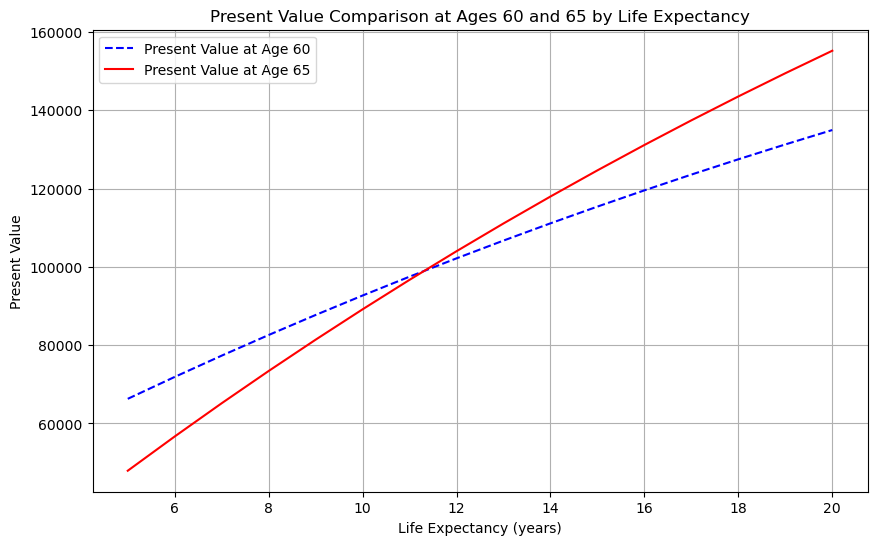

In [15]:
# Example usage:
payment_per_period_age2 = 1000  # Payment amount per period at age 2 (e.g., per month)
annual_interest_rate = 0.03  # Annual interest rate (as a decimal)
life_expectancy_range = range(5, 21)  # Range of life expectancies to compare (from 5 to 20 years)
age1 = 60  # First age to compare (e.g., 60)
age2 = 65  # Second age to compare (e.g., 65)
present_age = 60  # Current age (age at which present value is calculated)

plot_present_value_comparison(payment_per_period_age2, annual_interest_rate, life_expectancy_range, age1, age2, present_age)


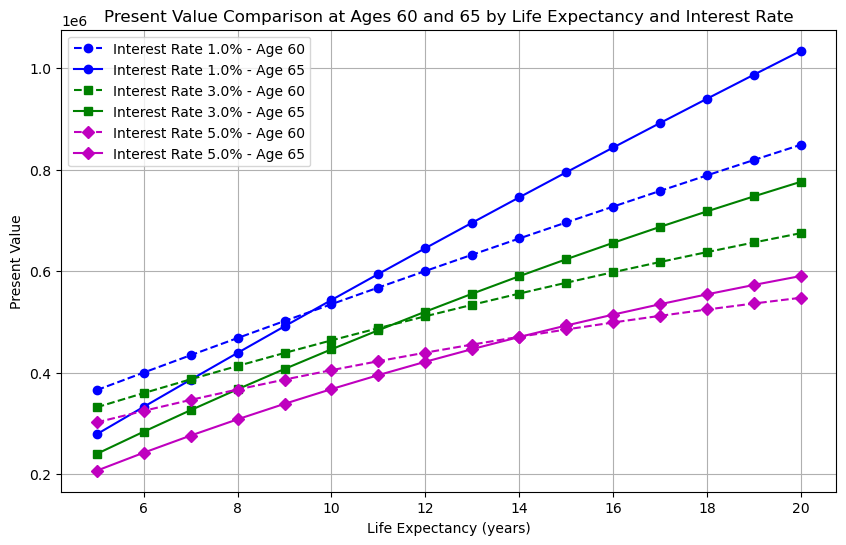

In [16]:
import matplotlib.pyplot as plt

def plot_present_value_comparison(payment_per_period_age2, annual_interest_rates, life_expectancy_range, age1, age2, present_age):
    """
    Plot the compared present values at ages 60 and 65 for different values of life expectancy and interest rates.

    Parameters:
    payment_per_period_age2 (float): Payment amount per period at age 2 (e.g., per month).
    annual_interest_rates (list): List of annual interest rates (as decimals).
    life_expectancy_range (range): Range of life expectancies to compare.
    age1 (int): First age to compare (e.g., 60).
    age2 (int): Second age to compare (e.g., 65).
    present_age (int): Current age (age at which present value is calculated).
    """
    plt.figure(figsize=(10, 6))

    color_cycle = plt.cm.tab10.colors  # Get a list of colors from the 'tab10' colormap

    markers = ['o', 's', 'D']  # Different markers for each line
    line_styles_60 = ['b--', 'g--', 'm--']  # Different line styles for age 60
    line_styles_65 = ['b-', 'g-', 'm-']     # Different line styles for age 65

    for i, annual_interest_rate in enumerate(annual_interest_rates):
        present_values_60 = []
        present_values_65 = []

        for life_expectancy_years in life_expectancy_range:
            present_value_at_age1, present_value_at_age2 = compare_present_value_at_ages(payment_per_period_age2, annual_interest_rate, life_expectancy_years+5, life_expectancy_years, age1, age2, present_age)
            present_values_60.append(present_value_at_age1)
            present_values_65.append(present_value_at_age2)

        color_index = i % len(color_cycle)  # Use modulo to cycle through colors
        plt.plot(list(life_expectancy_range), present_values_60, line_styles_60[i], label=f'Interest Rate {annual_interest_rate*100}% - Age 60', marker=markers[i])
        plt.plot(list(life_expectancy_range), present_values_65, line_styles_65[i], label=f'Interest Rate {annual_interest_rate*100}% - Age 65', marker=markers[i])

    plt.title('Present Value Comparison at Ages 60 and 65 by Life Expectancy and Interest Rate')
    plt.xlabel('Life Expectancy (years)')
    plt.ylabel('Present Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
payment_per_period_age2 = 10000/2  # Payment amount per period at age 2 (e.g., per month)
annual_interest_rates = [0.01, 0.03, 0.05]  # List of annual interest rates (as decimals)
life_expectancy_range = range(5, 21)  # Range of life expectancies to compare (from 5 to 20 years)
age1 = 60  # First age to compare (e.g., 60)
age2 = 65  # Second age to compare (e.g., 65)
present_age = 60  # Current age (age at which present value is calculated)

plot_present_value_comparison(payment_per_period_age2, annual_interest_rates, life_expectancy_range, age1, age2, present_age)


## Value at 65 when you claim at 65

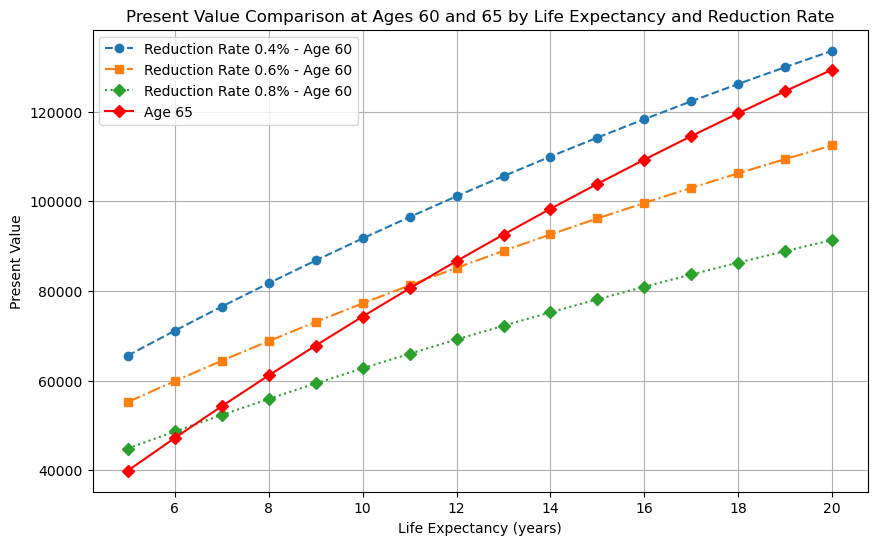

In [17]:
import matplotlib.pyplot as plt

def plot_present_value_comparison(payment_per_period_age2, annual_interest_rate, life_expectancy_range, age1, age2, present_age, reduction_rates):
    """
    Plot the compared present values at ages 60 and 65 for different values of life expectancy and reduction rates.

    Parameters:
    payment_per_period_age2 (float): Payment amount per period at age 2 (e.g., per month).
    annual_interest_rate (float): Annual interest rate (as a decimal).
    life_expectancy_range (range): Range of life expectancies to compare.
    age1 (int): First age to compare (e.g., 60).
    age2 (int): Second age to compare (e.g., 65).
    present_age (int): Current age (age at which present value is calculated).
    reduction_rates (list): List of reduction rates (as decimals).
    """
    plt.figure(figsize=(10, 6))

    color_cycle = plt.cm.tab10.colors  # Get a list of colors from the 'tab10' colormap

    markers = ['o', 's', 'D']  # Different markers for each line
    line_styles_60 = ['--', '-.', ':']  # Different line styles for age 60
    line_styles_65 = ['-', '-', '-']     # Different line styles for age 65

    for i, reduction_rate in enumerate(reduction_rates):
        present_values_60 = []
        present_values_65 = []

        for life_expectancy_years in life_expectancy_range:
            present_value_at_age1, present_value_at_age2 = compare_present_value_at_ages(payment_per_period_age2, annual_interest_rate, life_expectancy_years+5, life_expectancy_years, age1, age2, present_age, reduction_rate)
            present_values_60.append(present_value_at_age1)
            present_values_65.append(present_value_at_age2)

        color_index = i % len(color_cycle)  # Use modulo to cycle through colors
        plt.plot(list(life_expectancy_range), present_values_60, label=f'Reduction Rate {reduction_rate}% - Age 60', marker=markers[i], color=color_cycle[color_index], linestyle=line_styles_60[i])
    plt.plot(list(life_expectancy_range), present_values_65, label=f'Age 65', marker=markers[i], color='red', linestyle=line_styles_65[i])    
    
    plt.title('Present Value Comparison at Ages 60 and 65 by Life Expectancy and Reduction Rate')
    plt.xlabel('Life Expectancy (years)')
    plt.ylabel('Present Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
payment_per_period_age2 = 10000/12  # Payment amount per period at age 2 (e.g., per month)
annual_interest_rate = 0.03  # Annual interest rate (as a decimal)
life_expectancy_range = range(5, 21)  # Range of life expectancies to compare (from 5 to 20 years)
age1 = 60  # First age to compare (e.g., 60)
age2 = 65  # Second age to compare (e.g., 65)
present_age = 60  # Current age (age at which present value is calculated)
reduction_rates = [0.4, 0.6, 0.8]  # List of reduction rates (as decimals)

plot_present_value_comparison(payment_per_period_age2, annual_interest_rate, life_expectancy_range, age1, age2, present_age, reduction_rates)


## We can create a function that takes in various characterisics and outputs expected lifespans at 60 and 65

In [18]:
import pandas as pd
df = pd.read_csv('../data/ex_no_dis.csv', sep=',')

def get_exp_ls(coh,sex,imm,mrt,p,pp):
    life_exp=[]
    for num in [60, 65]:
        filter = (df[
        (df['AC'] == num) &          # 60 61 62 63 64 65
        (df['coh'] == coh) &      # 1926 1930 1935 1940 1945 1950
        (df['sex'] == sex) &         # 0(w) 1(m) No
        (df['imm'] == imm) &         # 0(no) 1(yes) No
        (df['mrt'] == mrt) &         # 0(div/single) 1(marr) 2(widow) No
        (df['p'] == p) &           # 1 2 3 4 5 No
        (df['pp'] == pp)])          # 0(no) 1 2 3 4 5 No
        if num==60:
            sum_60 = filter['ex60'].describe().loc['mean']
            life_exp.append(sum_60)
        elif num==65:
            sum_65 = filter['ex65'].describe().loc['mean']
            life_exp.append(sum_65)
    return life_exp

In [19]:
#Example
test=get_exp_ls(1950,1,1,2,5,1)
print("Expected lifespan at 60,65:", [round(num,7) for num in test])
df.tail(10)

Expected lifespan at 60,65: [24.6658105, 21.508763]


,Unnamed: 0,AC,coh,sex,imm,mrt,p,pp,ex60,ex65
15650,15650,65,1950,1,1,2,4,2,26.191437,21.722979
15651,15651,65,1950,1,1,2,4,3,26.410849,21.931896
15652,15652,65,1950,1,1,2,4,4,26.674182,22.182896
15653,15653,65,1950,1,1,2,4,5,28.717877,24.139924
15654,15654,65,1950,1,1,2,5,0,22.985598,18.695789
15655,15655,65,1950,1,1,2,5,1,25.966239,21.508763
15656,15656,65,1950,1,1,2,5,2,26.271528,21.799216
15657,15657,65,1950,1,1,2,5,3,26.491113,22.008370
15658,15658,65,1950,1,1,2,5,4,26.754647,22.259648
15659,15659,65,1950,1,1,2,5,5,28.799741,24.218629


## We can create a function that takes in life expectancies for given characteristics as input, calculates the values for claiming at ages 60 and 65, and then compares them

In [20]:
def claiming_age_comp(payment_per_period, annual_interest_rate, adjustment_rate, coh, sex, imm, mrt, p, pp):
        
    life_exp=get_exp_ls(coh,sex,imm,mrt,p,pp) #get life expectancies
    monthly_interest_rate = annual_interest_rate / 12  # Convert annual interest rate to monthly
    total_periods = [life*12 for life in life_exp]  # Convert life expectancy to months
    adj=1-((adjustment_rate*12*5)/100) #transform adjustment factor to full difference between 60 and 65
    adjustment=[adj,1]
    present_value=[]
    payment_per_period=[payment_per_period]*2
    pmt=[a*b for a,b in zip(adjustment,payment_per_period)]
    
    #compute present values for annuities at both expected lifespan on adjusted payments
    for time in total_periods:
        if time == total_periods[0]:
            pv = pmt[0] / monthly_interest_rate * (1 - (1 / (1 + monthly_interest_rate) ** time))
        elif time == total_periods[1]:
            pv = pmt[1] / monthly_interest_rate * (1 - (1 / (1 + monthly_interest_rate) ** time))            
        present_value.append(pv)
        
    return present_value

In [21]:
def explain_char(coh,sex,imm,mrt,p,pp): #To make the results more readable
    if sex==0:
        gender='women'
    elif sex==1:
        gender='men'
    if imm==0:
        migrant= "non-migrant"
    elif imm==1:
        migrant= "immigrant"
    if mrt==0:
        mart='div/single'
    elif mrt==1:
        mart='married'
    elif mrt==2:
        mart='widowed'
    if p==1:
        pens='first quintile'
    elif p==2:
        pens='second quintile'  
    elif p==3:
        pens='third quintile'  
    elif p==4:
        pens='frouth quintile'  
    elif p==5:
        pens='fifth quintile'  
    if pp==0:
        ppens='no private pension' 
    if pp==1:
        ppens='a private pension in the first quintile'
    elif pp==2:
        ppens='a private pension in the second quintile'  
    elif pp==3:
        ppens='a private pension in the third quintile'  
    elif pp==4:
        ppens='a private pension in the frouth quintile'  
    elif pp==5:
        ppens='a private pension in the fifth quintile'  
    return print("For a",mart,migrant,gender,"born in the",coh,"cohort,\nWith public pension in the",pens,"and",ppens)

In [22]:
monthly_pmt=1000
annual_r=.03
monthly_adjustment_factor=.6 #in percentage
cohort=1950
sex=0
immigrant=1
marital=1
pension=5
private_pension=5

test=claiming_age_comp(monthly_pmt,annual_r,monthly_adjustment_factor,cohort,sex,immigrant,marital,pension,private_pension)
explain_char(cohort,sex,immigrant,marital,pension,private_pension)
print("Present value for claim at 60 =", round(test[0],2))
print("Present value for claim at 65 =", round(test[1],2))

For a married immigrant women born in the 1950 cohort,
With public pension in the fifth quintile and a private pension in the fifth quintile
Present value for claim at 60 = 164103.86
Present value for claim at 65 = 240995.69


## We can modify the code to vary the annual interest rate

In [23]:
import matplotlib.pyplot as plt

def plot_present_value_comparison(payment_per_period_age2, annual_interest_rate, life_expectancy_range, age1, age2, present_age, reduction_rate=0.6):
    """
    Plot the compared present values at ages 60 and 65 for different values of life expectancy.

    Parameters:
    payment_per_period_age2 (float): Payment amount per period at age 2 (e.g., per month).
    annual_interest_rate (float): Annual interest rate (as a decimal).
    life_expectancy_range (range): Range of life expectancies to compare.
    age1 (int): First age to compare (e.g., 60).
    age2 (int): Second age to compare (e.g., 65).
    present_age (int): Current age (age at which present value is calculated).
    reduction_rate (float, optional): Monthly reduction rate (default is 0.6%).
    """
    present_values_60 = []
    present_values_65 = []

    for life_expectancy_years in life_expectancy_range:
        present_value_at_age1, present_value_at_age2 = compare_present_value_at_ages(payment_per_period_age2, annual_interest_rate, life_expectancy_years+5, life_expectancy_years, age1, age2, present_age)
        present_values_60.append(present_value_at_age1)
        present_values_65.append(present_value_at_age2)

    plt.figure(figsize=(10, 6))
    plt.plot(list(life_expectancy_range), present_values_60, 'b--', label='Present Value at Age 60')  # Blue dashed line
    plt.plot(list(life_expectancy_range), present_values_65, 'r-', label='Present Value at Age 65')   # Red solid line
    plt.title('Present Value Comparison at Ages 60 and 65 by Life Expectancy')
    plt.xlabel('Life Expectancy (years)')
    plt.ylabel('Present Value')
    plt.legend()
    plt.grid(True)
    plt.show()

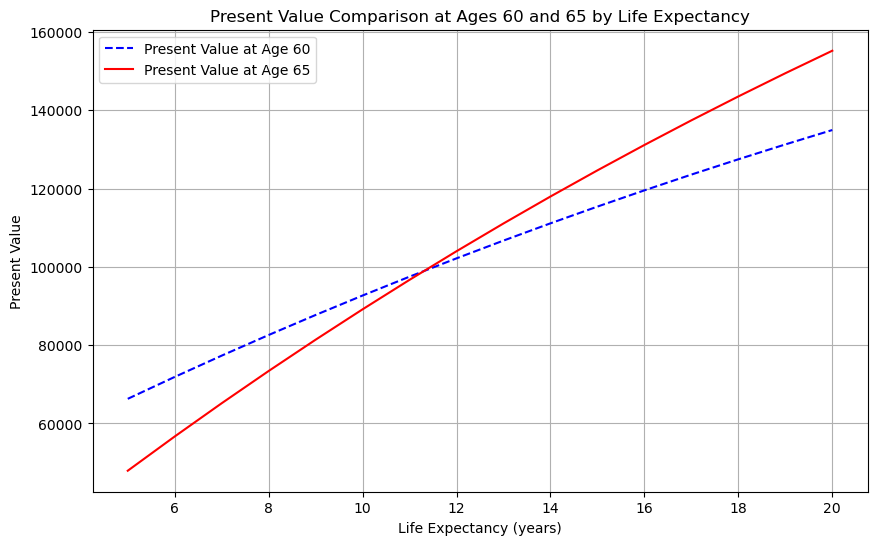

In [24]:
# Example usage:
payment_per_period_age2 = 1000  # Payment amount per period at age 2 (e.g., per month)
annual_interest_rate = 0.03  # Annual interest rate (as a decimal)
life_expectancy_range = range(5, 21)  # Range of life expectancies to compare (from 5 to 20 years)
age1 = 60  # First age to compare (e.g., 60)
age2 = 65  # Second age to compare (e.g., 65)
present_age = 60  # Current age (age at which present value is calculated)

plot_present_value_comparison(payment_per_period_age2, annual_interest_rate, life_expectancy_range, age1, age2, present_age)


## Change in the payment

In [25]:
def present_value_lifetime_annuity_at_age(payment_by_period_func, annual_interest_rate, life_expectancy_years, age_received, present_age):
    """
    Calculate the present value at a specified age of a lifetime annuity starting at age 65.

    Parameters:
    payment_by_period_func (function): Function to calculate payment amount per period based on the year.
    annual_interest_rate (float): Annual interest rate (as a decimal).
    life_expectancy_years (int): Life expectancy in years.
    age_received (int): Age at which the amount is received (typically 65).
    present_age (int): Current age (age at which present value is calculated).

    Returns:
    float: Present value of the received amount at the specified age.
    """
    # Calculate amount received from present_value_lifetime_annuity
    amount_received = present_value_lifetime_annuity(payment_by_period_func, annual_interest_rate, life_expectancy_years)

    # Calculate present value at specified age using present_value
    present_value_at_age = present_value(amount_received, annual_interest_rate, age_received, present_age)

    return present_value_at_age

In [26]:
def present_value(payment_by_period_func, annual_interest_rate, age_received, present_age):
    """
    Calculate the present value of an amount received in the future at a specified age.

    Parameters:
    payment_by_period_func (function): Function to calculate payment amount per period based on age.
    annual_interest_rate (float): Annual interest rate (as a decimal).
    age_received (int): Age at which the amount is received.
    present_age (int): Current age.

    Returns:
    float: Present value of the amount received at the specified age.
    """
    # Calculate payment amount at the specified age using payment_by_period_func
    payment_per_period = payment_by_period_func(age_received, present_age)

    # Calculate present value using the calculated payment amount
    monthly_interest_rate = annual_interest_rate / 12  # Convert annual interest rate to monthly
    years_until_received = age_received - present_age  # Calculate years until amount is received

    present_value = payment_per_period / monthly_interest_rate * (1 - (1 / (1 + monthly_interest_rate) ** (years_until_received * 12)))
    
    return present_value


In [27]:
# Example usage of present_value with payment_by_period_func
annual_interest_rate = 0.03  # Annual interest rate (as a decimal)
age_received = 65  # Age at which the amount is received
present_age = 65  # Current age

# Define the payment_by_period_func function
def payment_by_period_func(year, age_received):
    if age_received == 65:
        return 1000  # Fixed payment amount at age 65
    elif age_received <= 70:
        return max(500 + 100 * (age_received - 60), 1000)  # Payment increases by 100 each year from age 60 to 70, minimum of 1000
    else:
        return 1500  # Payment amount after age 70

# Calculate present value at a specified age with varying payments
present_value_at_age = present_value(payment_by_period_func, annual_interest_rate, age_received, present_age)

print("Present value at age", present_age, ":", present_value_at_age)


Present value at age 65 : 0.0


In [85]:
def present_value_lifetime_annuity(payment_per_period_func, annual_interest_rate, life_expectancy_years, present_age):
    """
    Calculate the present value of a lifetime annuity with monthly payments that change over time.

    Parameters:
    payment_per_period_func (function): Function to calculate the monthly payment amount for each month.
    annual_interest_rate (float): Annual interest rate (as a decimal).
    life_expectancy_years (int): Life expectancy in years.
    present_age (int): Current age.

    Returns:
    float: Present value of the lifetime annuity.
    """
    present_value_total = 0
    for month in range(life_expectancy_years*12):
        payment = payment_per_period_func(month,drate)
        present_value_total += payment / ((1 + annual_interest_rate / 12) ** (month))
    return present_value_total

# Example usage:
def payment_per_period_func(month,drate):
    """
    Function to calculate the monthly payment amount for each month.
    """
    if month < 120:  # First 10 years (120 months)
        return 5000/12*(1+drate*month)   # Payment increases by 10 each month for the first 10 years
    else:  # After year 10 years
        return 5000/12*(1+drate*120)

annual_interest_rate = 0.03  # Annual interest rate (as a decimal)
life_expectancy_years = 25  # Life expectancy in years
present_age = 60  # Current age
drate=0.0046

present_value_total = present_value_lifetime_annuity(payment_per_period_func, annual_interest_rate, life_expectancy_years, present_age)
print("Present value of the lifetime annuity:", present_value_total)

Present value of the lifetime annuity: 124073.52748340933


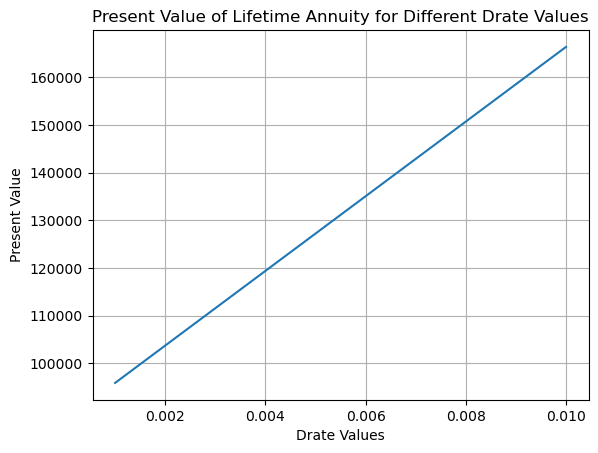

In [89]:
import numpy as np
import matplotlib.pyplot as plt

def present_value_lifetime_annuity(payment_per_period_func, annual_interest_rate, life_expectancy_years, present_age):
    """
    Calculate the present value of a lifetime annuity with monthly payments that change over time.

    Parameters:
    payment_per_period_func (function): Function to calculate the monthly payment amount for each month.
    annual_interest_rate (float): Annual interest rate (as a decimal).
    life_expectancy_years (int): Life expectancy in years.
    present_age (int): Current age.

    Returns:
    float: Present value of the lifetime annuity.
    """
    present_value_total = 0
    for month in range(life_expectancy_years * 12):
        payment = payment_per_period_func(month, drate)
        present_value_total += payment / ((1 + annual_interest_rate / 12) ** month)
    return present_value_total

def payment_per_period_func(month, drate):
    """
    Function to calculate the monthly payment amount for each month.
    """
    if month < 120:  # First 10 years (120 months)
        return 5000 / 12 * (1 + drate * month)   # Payment increases by 10 each month for the first 10 years
    else:  # After year 10 years
        return 5000 / 12 * (1 + drate * 120)

annual_interest_rate = 0.03  # Annual interest rate (as a decimal)
life_expectancy_years = 25  # Life expectancy in years
present_age = 60  # Current age

# Range of drate values
start_drate = 0.001
stop_drate = 0.01
num_drate_values = 15  # Number of drate values in the range

# Generate drate values using numpy.linspace
drate_values = np.linspace(start_drate, stop_drate, num_drate_values)

# Calculate present value for each drate value
present_values = []
for drate in drate_values:
    present_value = present_value_lifetime_annuity(payment_per_period_func, annual_interest_rate, life_expectancy_years, present_age)
    present_values.append(present_value)

# Plotting
plt.plot(drate_values, present_values)
plt.title('Present Value of Lifetime Annuity for Different Drate Values')
plt.xlabel('Drate Values')
plt.ylabel('Present Value')
plt.grid(True)
plt.show()


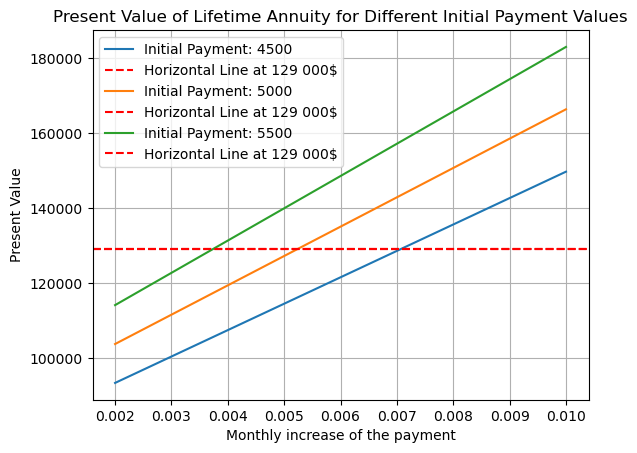

In [97]:
import numpy as np
import matplotlib.pyplot as plt

def present_value_lifetime_annuity(payment_per_period_func, annual_interest_rate, life_expectancy_years, present_age):
    """
    Calculate the present value of a lifetime annuity with monthly payments that change over time.

    Parameters:
    payment_per_period_func (function): Function to calculate the monthly payment amount for each month.
    annual_interest_rate (float): Annual interest rate (as a decimal).
    life_expectancy_years (int): Life expectancy in years.
    present_age (int): Current age.

    Returns:
    float: Present value of the lifetime annuity.
    """
    present_value_total = 0
    for month in range(life_expectancy_years * 12):
        payment = payment_per_period_func(month, drate)
        present_value_total += payment / ((1 + annual_interest_rate / 12) ** month)
    return present_value_total

def payment_per_period_func(month, drate, initial_payment):
    """
    Function to calculate the monthly payment amount for each month.
    """
    if month < 120:  # First 10 years (120 months)
        return initial_payment / 12 * (1 + drate * month)   # Payment increases by 10 each month for the first 10 years
    else:  # After year 10 years
        return initial_payment / 12 * (1 + drate * 120)

annual_interest_rate = 0.03  # Annual interest rate (as a decimal)
life_expectancy_years = 25  # Life expectancy in years
present_age = 60  # Current age

# Range of drate values
start_drate = 0.002
stop_drate = 0.01
num_drate_values = 10  # Number of drate values in the range

# Generate drate values using numpy.linspace
drate_values = np.linspace(start_drate, stop_drate, num_drate_values)

# Initial payment values
initial_payments = [4500, 5000, 5500]

# Plotting for each initial payment value
for initial_payment in initial_payments:
    present_values = []
    for drate in drate_values:
        present_value = present_value_lifetime_annuity(lambda month, drate: payment_per_period_func(month, drate, initial_payment), annual_interest_rate, life_expectancy_years, present_age)
        present_values.append(present_value)

    # Plotting
    plt.plot(drate_values, present_values, label=f'Initial Payment: {initial_payment}')
    plt.axhline(y=129000, color='r', linestyle='--', label='Horizontal Line at 129 000$')
    
plt.title('Present Value of Lifetime Annuity for Different Initial Payment Values')
plt.xlabel('Monthly increase of the payment')
plt.ylabel('Present Value')
plt.legend()
plt.grid(True)
plt.show()